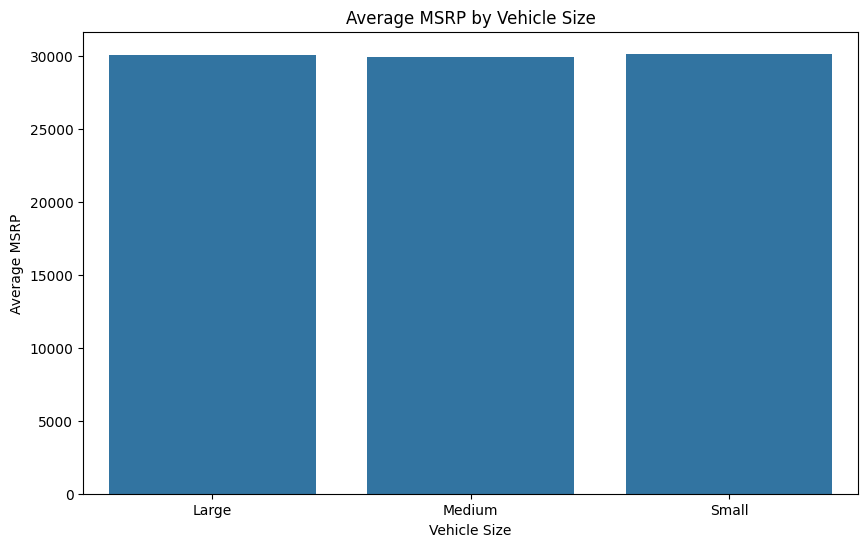

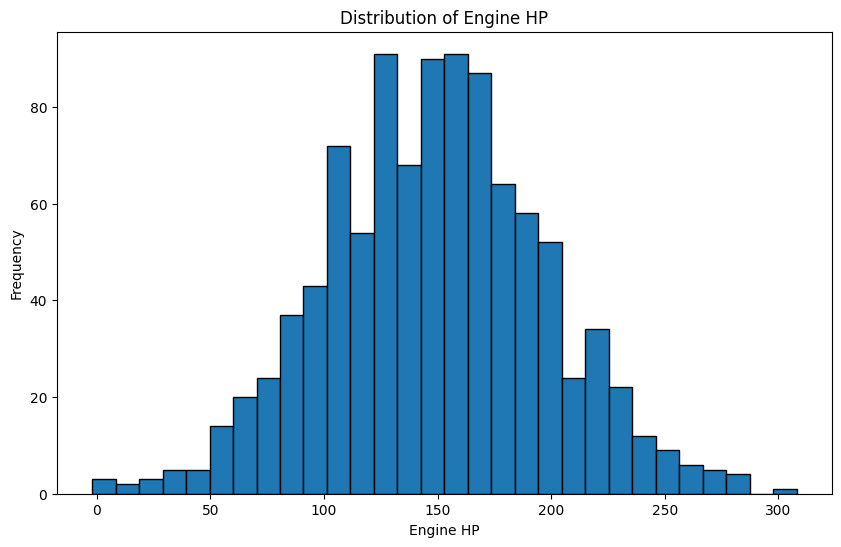

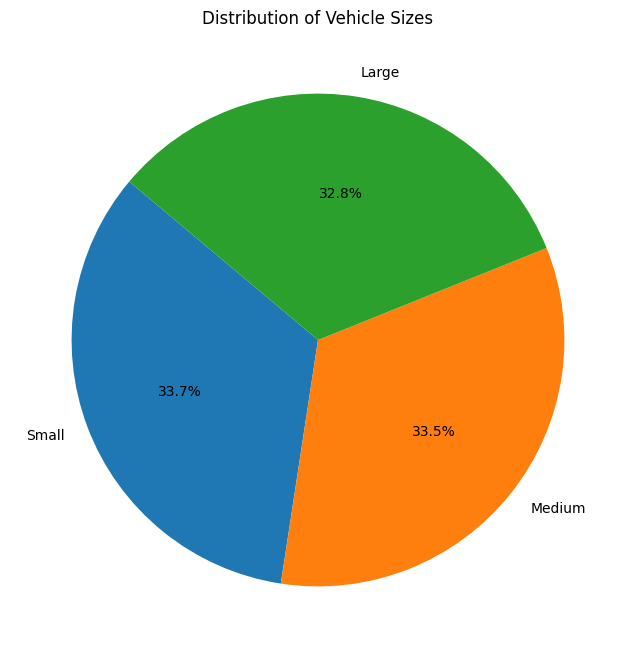

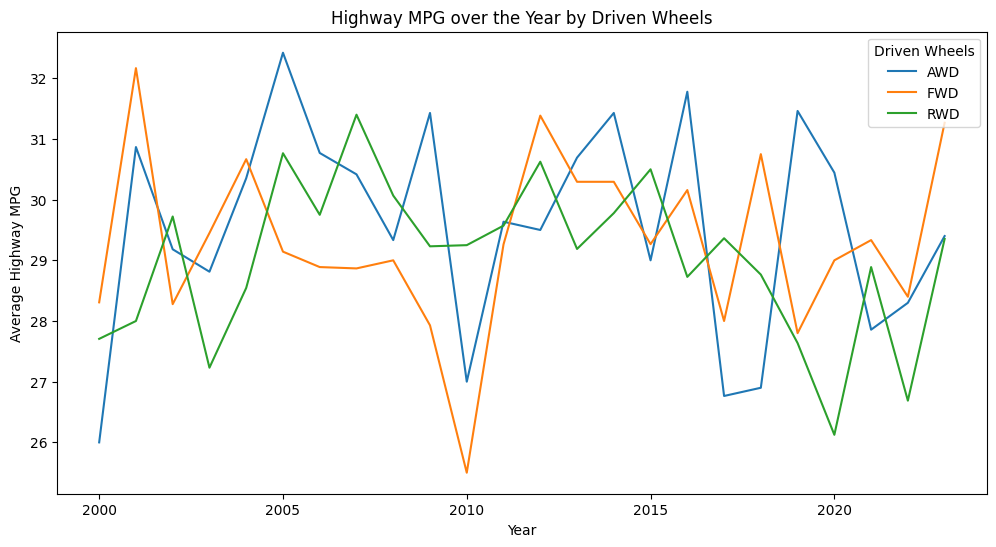

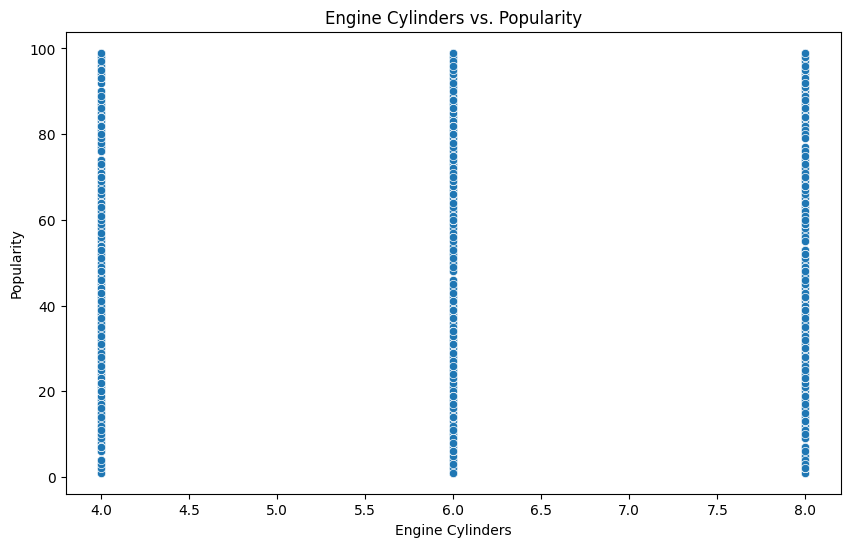

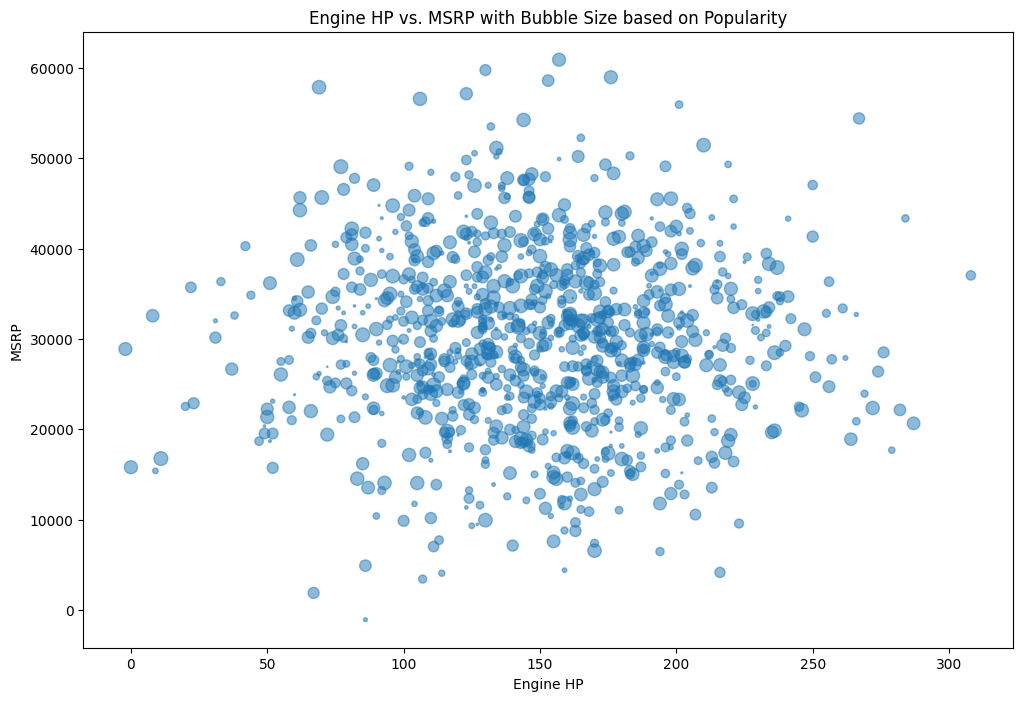

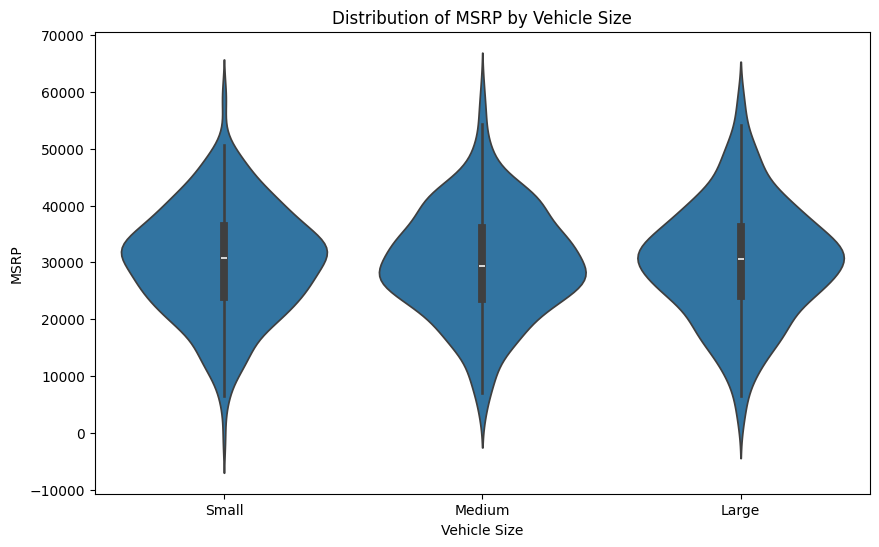

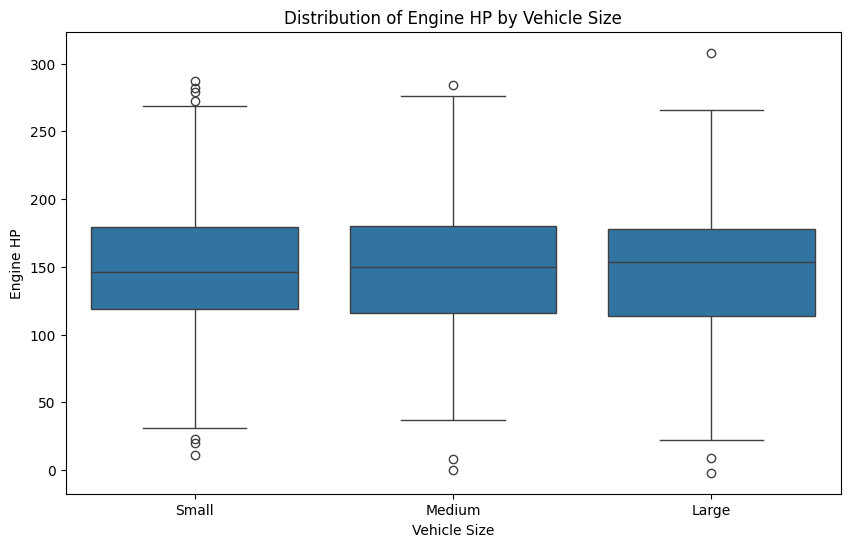

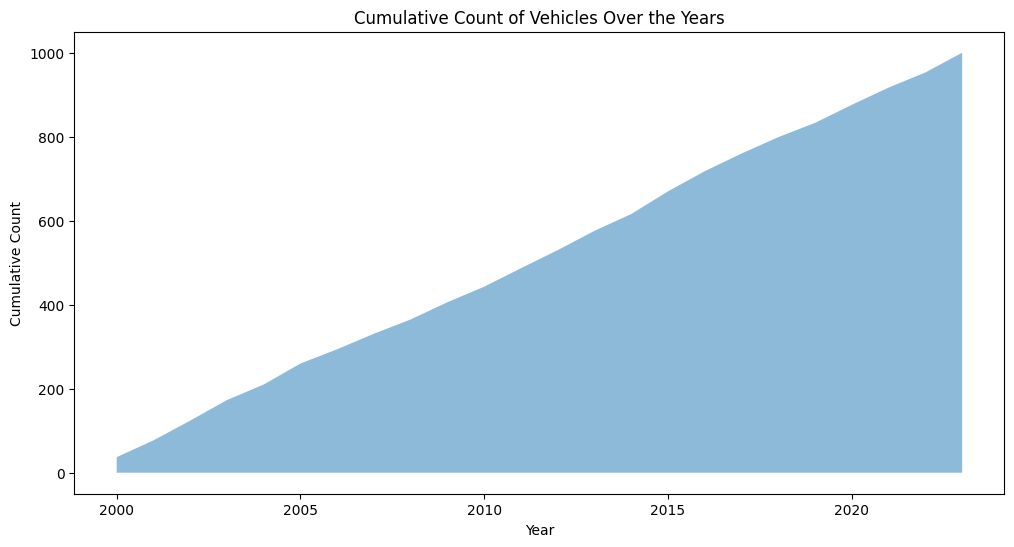

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Sample DataFrame for demonstration purposes
np.random.seed(0)
df = pd.DataFrame({
    'Vehicle Size': np.random.choice(['Small', 'Medium', 'Large'], 1000),
    'Engine HP': np.random.normal(150, 50, 1000).astype(int),
    'Engine Cylinders': np.random.choice([4, 6, 8], 1000),
    'MSRP': np.random.normal(30000, 10000, 1000).astype(int),
    'Popularity': np.random.randint(1, 100, 1000),
    'Driven Wheels': np.random.choice(['FWD', 'RWD', 'AWD'], 1000),
    'Year': np.random.randint(2000, 2024, 1000),
    'Vehicle Style': np.random.choice(['Sedan', 'SUV', 'Truck', 'Coupe'], 1000),
    'Make': np.random.choice(['Make A', 'Make B', 'Make C'], 1000),
})

# 1. Bar Graph: Average MSRP by Vehicle Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Size', y='MSRP', data=df.groupby('Vehicle Size').agg({'MSRP': 'mean'}).reset_index())
plt.title('Average MSRP by Vehicle Size')
plt.ylabel('Average MSRP')
plt.xlabel('Vehicle Size')
plt.show()

# 2. Histogram: Distribution of Engine HP
plt.figure(figsize=(10, 6))
plt.hist(df['Engine HP'], bins=30, edgecolor='black')
plt.title('Distribution of Engine HP')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.show()

# 3. Pie Chart: Distribution of Vehicle Sizes
plt.figure(figsize=(8, 8))
size_distribution = df['Vehicle Size'].value_counts()
plt.pie(size_distribution, labels=size_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle Sizes')
plt.show()

# 4. Line Graph: Highway MPG over the Year for a specific Driven Wheels
# Assuming 'Highway MPG' column is in the DataFrame
df['Highway MPG'] = np.random.uniform(20, 40, 1000).astype(int)  # Example data
plt.figure(figsize=(12, 6))
for wheel_type in df['Driven Wheels'].unique():
    subset = df[df['Driven Wheels'] == wheel_type]
    yearly_avg = subset.groupby('Year')['Highway MPG'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, label=wheel_type)
plt.title('Highway MPG over the Year by Driven Wheels')
plt.xlabel('Year')
plt.ylabel('Average Highway MPG')
plt.legend(title='Driven Wheels')
plt.show()

# 5. Scatter Plot: Engine Cylinders vs. Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Cylinders', y='Popularity', data=df)
plt.title('Engine Cylinders vs. Popularity')
plt.xlabel('Engine Cylinders')
plt.ylabel('Popularity')
plt.show()

# 6. Bubble Chart: Engine HP vs. MSRP with bubble size based on Popularity
plt.figure(figsize=(12, 8))
plt.scatter(df['Engine HP'], df['MSRP'], s=df['Popularity'], alpha=0.5)
plt.title('Engine HP vs. MSRP with Bubble Size based on Popularity')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# 7. Violin Plot: Distribution of MSRP by Vehicle Size
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vehicle Size', y='MSRP', data=df)
plt.title('Distribution of MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.show()

# 8. Box Plot: Distribution of Engine HP by Vehicle Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='Engine HP', data=df)
plt.title('Distribution of Engine HP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Engine HP')
plt.show()

# 9. Area Chart: Cumulative count of vehicles over the years
df['Count'] = 1
df_cumulative = df.groupby('Year').sum().cumsum()
plt.figure(figsize=(12, 6))
plt.fill_between(df_cumulative.index, df_cumulative['Count'], alpha=0.5)
plt.title('Cumulative Count of Vehicles Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.show()

# 10. Tree Map: Count of Vehicle Style by Make
fig = px.treemap(df, path=['Make', 'Vehicle Style'], values='Count', title='Count of Vehicle Style by Make')
fig.show()
